<a href="https://colab.research.google.com/github/dnesemgithb/CS4410/blob/main/Ex_15_17_Binary_Classification_with_the_Breast_Cancer_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
from sklearn.datasets import load_breast_cancer

In [47]:
breast_cancer = load_breast_cancer()

In [48]:
print("Num samples: ", breast_cancer.data.shape[0])
print("Num features: ", breast_cancer.data.shape[1])
print("Target vector shape: ", breast_cancer.target.shape)
print("Target names: ", breast_cancer.target_names)

Num samples:  569
Num features:  30
Target vector shape:  (569,)
Target names:  ['malignant' 'benign']


In [49]:
import numpy as np
print("Class distribution (0=malignant, 1=benign): ", np.bincount(breast_cancer.target))

Class distribution (0=malignant, 1=benign):  [212 357]


In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(
    breast_cancer.data,
    breast_cancer.target,
    test_size=0.3,
    random_state=11,
    stratify=breast_cancer.target
)

In [52]:
print("Training set size: ", X_train.shape[0])
print("Testing set size: ", X_test.shape[0])

Training set size:  398
Testing set size:  171


In [53]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

In [54]:
nb.fit(X_train, y_train)

GaussianNB()

In [55]:
predicted = nb.predict(X_test)
expected = y_test

In [56]:
print("First 10 predictions: ", predicted[:10])
print("First 10 actual:      ", expected[:10])

First 10 predictions:  [1 1 1 0 1 1 0 1 0 1]
First 10 actual:       [1 1 1 0 1 0 0 1 0 1]


In [57]:
print("Training accuracy :", round(nb.score(X_train, y_train), 4))

Training accuracy : 0.9447


In [58]:
print("Testing accuracty :", round(nb.score(X_test, y_test), 4))

Testing accuracty : 0.9298


In [59]:
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(expected, predicted)
print("Confusion Matrix:\n", cf)

Confusion Matrix:
 [[ 55   9]
 [  3 104]]


In [60]:
from sklearn.metrics import classification_report
print(classification_report(expected, predicted, target_names=breast_cancer.target_names))

              precision    recall  f1-score   support

   malignant       0.95      0.86      0.90        64
      benign       0.92      0.97      0.95       107

    accuracy                           0.93       171
   macro avg       0.93      0.92      0.92       171
weighted avg       0.93      0.93      0.93       171



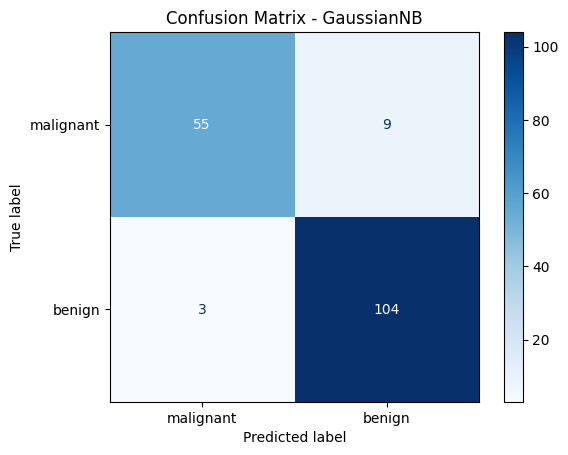

In [61]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(nb,X_test,y_test,display_labels=breast_cancer.target_names,cmap='Blues')
plt.title("Confusion Matrix - GaussianNB")
plt.show()

In [62]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, random_state=11, shuffle=True)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=nb, X=breast_cancer.data, y=breast_cancer.target, cv=kfold)

In [63]:
print("10-fold cross validation accuracies:")
print(scores)
print("\nMean accuracy:", round(scores.mean(),4))
print("Standard deviation:", round(scores.std(),4))

10-fold cross validation accuracies:
[0.96491228 0.9122807  0.94736842 0.89473684 0.96491228 0.94736842
 0.96491228 0.89473684 0.96491228 0.92857143]

Mean accuracy: 0.9385
Standard deviation: 0.0275


In [64]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

estimators = {
    'GaussianNB': nb,
    'KNeighborsClassifier': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=10000),
    'SVC': SVC(gamma='scale')
}

In [65]:
print("Model comparision on test set (same train/test split):")
for name, estimator in estimators.items():
  estimator.fit(X_train, y_train)
  accuracy = estimator.score(X_test, y_test)
  print(f"{name:20} - Test Accuracy: {accuracy:.4f}")

Model comparision on test set (same train/test split):
GaussianNB           - Test Accuracy: 0.9298
KNeighborsClassifier - Test Accuracy: 0.9240


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression   - Test Accuracy: 0.9532
SVC                  - Test Accuracy: 0.9357


In [66]:
print("\n10-fold CV mean accuracies:")
for name, estimator in estimators.items():
  cv_scores = cross_val_score(estimator, breast_cancer.data,breast_cancer.target,cv=kfold)
  print(f"{name:20} - CV mean: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")


10-fold CV mean accuracies:
GaussianNB           - CV mean: 0.9385 (±0.0275)
KNeighborsClassifier - CV mean: 0.9279 (±0.0201)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was depre

LogisticRegression   - CV mean: 0.9508 (±0.0302)
SVC                  - CV mean: 0.9192 (±0.0352)
